# Clusterização com Scikit-Learn

**O objetivo** deste treinamento será criar um modelo de Machine Learning utilizando a técnica de Clusterização para agrupar os diferentes filmes e suas categorias e construir um sistema de recomendação, algo similar ao que o Netflix faz.

!pip install seaborn

## 1. Preparando os dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1 Importando as bibliotecas principais

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#### Sobre o Dataset deste projeto

**MovieLens ML Small 100k**: https://grouplens.org/datasets/movielens/

MovieLens é um dataset criado pelo Grouplens que coleciona dados de informações e avaliações de filmes do website Movielens (http://movielens.org/). Os conjuntos de dados foram coletados por vários períodos de tempo, dependendo do tamanho do conjunto. Neste caso, usaremos a versão educacional da base que possui 100.000 registros. A base total chega a 27.000.000 de registros 😮.

**O objetivo** deste treinamento será criar um modelo de Machine Learning utilizando a técnica de Clusterização para agrupar os diferentes filmes e suas categorias e construir um sistema de recomendação, algo similar ao que o Netflix faz.

Descrição das características do Dataset:
- movies.csv: Lista com os filmes e suas categorias **Utilizaremos este arquivo para o treinamento**
  - movieId: Número identificador do filme
  - title: Título do filme
  - genres: Listagem de gêneros
- ratings.csv: Lista das avaliações dos filmes
- links.csv: Links dos filmes na plataforma
- tags.csv: Tags relacionadas aos filmes



#### Lendo o arquivo que contém os nossos dados e criando um Dataframe com o Pandas

In [3]:
movies = pd.read_csv('/content/drive/MyDrive/projeto_clusterizacao/movies.csv')

#### Mostrando as 5 primeiras linhas do Dataframe

In [4]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Mostrando as 5 últimas linhas do Dataframe

In [5]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


#### Exibindo informações importantes do Dataframe

In [6]:
# Resume e descreve algumas operações gerais do Dataset. Round(2) arredonda para 2 casas decimais.
movies.describe().round(2)

,movieId
count,9742.00
mean,42200.35
std,52160.49
min,1.00
25%,3248.25
50%,7300.00
75%,76232.00
max,193609.00


In [7]:
# Descreve o tamanho do dataframe em uma tupla
print(f'Len dataframe:{movies.shape[0]} rows and {movies.shape[1]} columns')

Len dataframe:9742 rows and 3 columns


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### 1.3 Selecionando as características principais para o estudo

**Qual coluna utilizaremos para realizar nosso experimento?**

In [9]:
print(movies.head(2))

   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy


#### Separando os gêneros em colunas indicadoras (Dicotomização ou Normalização)
O método get_dummies() pertence à biblioteca Pandas e converte uma variável categórica (generos) em variáveis indicadoras (dummies)que podem assumir somente 2 valores: 0 ou 1.

In [10]:
genres = movies['genres'].str.get_dummies()
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Unindo os dataframes filmes e generos

In [11]:
data_movies = pd.concat([movies, genres], axis=1)
data_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 1.4 Quais dessas características influenciam mais os filmes? Como definir pesos?
Usando Sklearn para escalar os dados.
#### Instanciando a Classe Standard Scaler
As classes em linguagens de programação são projetos de um objeto que possui características e comportamentos, ou seja, permite armazenar **propriedades** e **métodos** dentro dela. Instanciar uma classe significa que poderá utilizar tudo que está incluído nela ao atribuí-la a uma variável.

In [12]:
from sklearn.preprocessing import StandardScaler
scales = StandardScaler()

#### Ensinando a classe a aprender com os nossos dados

In [13]:
scaled_genres = scales.fit_transform(genres)
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

<img src="https://scikit-learn.org/stable/_static/ml_map.png"/>

### 2.1 Clusterização
Clusterização é a tarefa de dividir a população ou os pontos de dados em vários grupos, de modo que os pontos de dados nos mesmos grupos sejam mais semelhantes a outros pontos de dados no mesmo grupo do que os de outros grupos. Em palavras simples, o objetivo é segregar grupos com traços semelhantes e atribuí-los a clusters.

Fontes:
- https://portaldatascience.com/introducao-a-clusterizacao-e-os-diferentes-metodos/#:~:text=Clusteriza%C3%A7%C3%A3o%20%C3%A9%20a%20tarefa%20de,que%20os%20de%20outros%20grupos
- https://rpubs.com/cyobero/k-means

#### Importando o algoritmo KMeans de clusterização da biblioteca scikit-learn

In [14]:
from sklearn.cluster import KMeans

## 3. Ajustar os dados ao modelo e fazer a clusterização

### 3.1 Instanciar a classe KMeans()
O K-means é um algoritmo do tipo não supervisionado, ou seja, que não trabalha com dados rotulados. O objetivo desse algoritmo é encontrar similaridades entre os dados e agrupá-los conforme o número de cluster passado pelo argumento k.

#### Como funciona o KMeans
- Especifica o número de clusters K;
- Inicializa os centróides embaralhando primeiro o conjunto de dados e selecionando aleatoriamente K pontos de dados para os centróides sem substituição;
- Continua iterando até que não haja alterações nos centróides. ou seja, a atribuição de pontos de dados a clusters não está mudando;



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif">

Fonte: https://minerandodados.com.br/entenda-o-algoritmo-k-means/
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [15]:
 #Instanciando/ Parâmetros: **n_clusters** representa o número de clusters (agrupamentos) que faremos
 model = KMeans(n_clusters=3)

In [16]:
 # Principais parâmetros personalizáveis da classe
 model.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

### 3.2 Utilizando o método .fit()
O método .fit() do objeto modelo criado da classe KMeans() treinará o nosso modelo e criará os clusters (agrupamentos).

In [17]:
model.fit(scaled_genres);

### 3.3 Exibindo os clusters criados pelo KMeans
O objetivo principal do nosso modelo é agrupar os dados de acordo com as principais características de gêneros.

In [18]:
groups_created = model.labels_
print(f'Grupos criados: {np.unique(groups_created)} | Checando os grupos: {groups_created[:5]}')

Grupos criados: [0 1 2] | Checando os grupos: [0 0 1 1 1]


### 3.4 Visualizando os grupos

#### Criando um dataset com os centróides dos grupos

In [19]:
groups = pd.DataFrame(model.cluster_centers_, columns=genres.columns).transpose()
groups

,0,1,2
(no genres listed),-0.059180,0.040308,-0.059180
Action,-0.033867,-0.317514,0.623803
Adventure,0.875959,-0.215909,0.140799
Animation,2.283147,-0.252274,-0.232566
Children,2.506293,-0.270451,-0.267807
Comedy,0.230806,0.258017,-0.570993
Crime,-0.316713,-0.179758,0.446953
Documentary,-0.202219,0.144809,-0.215885
Drama,-0.589873,0.201581,-0.203314
Fantasy,0.854888,-0.148482,0.017237


#### Plotando os grupos em um gráfico de barras

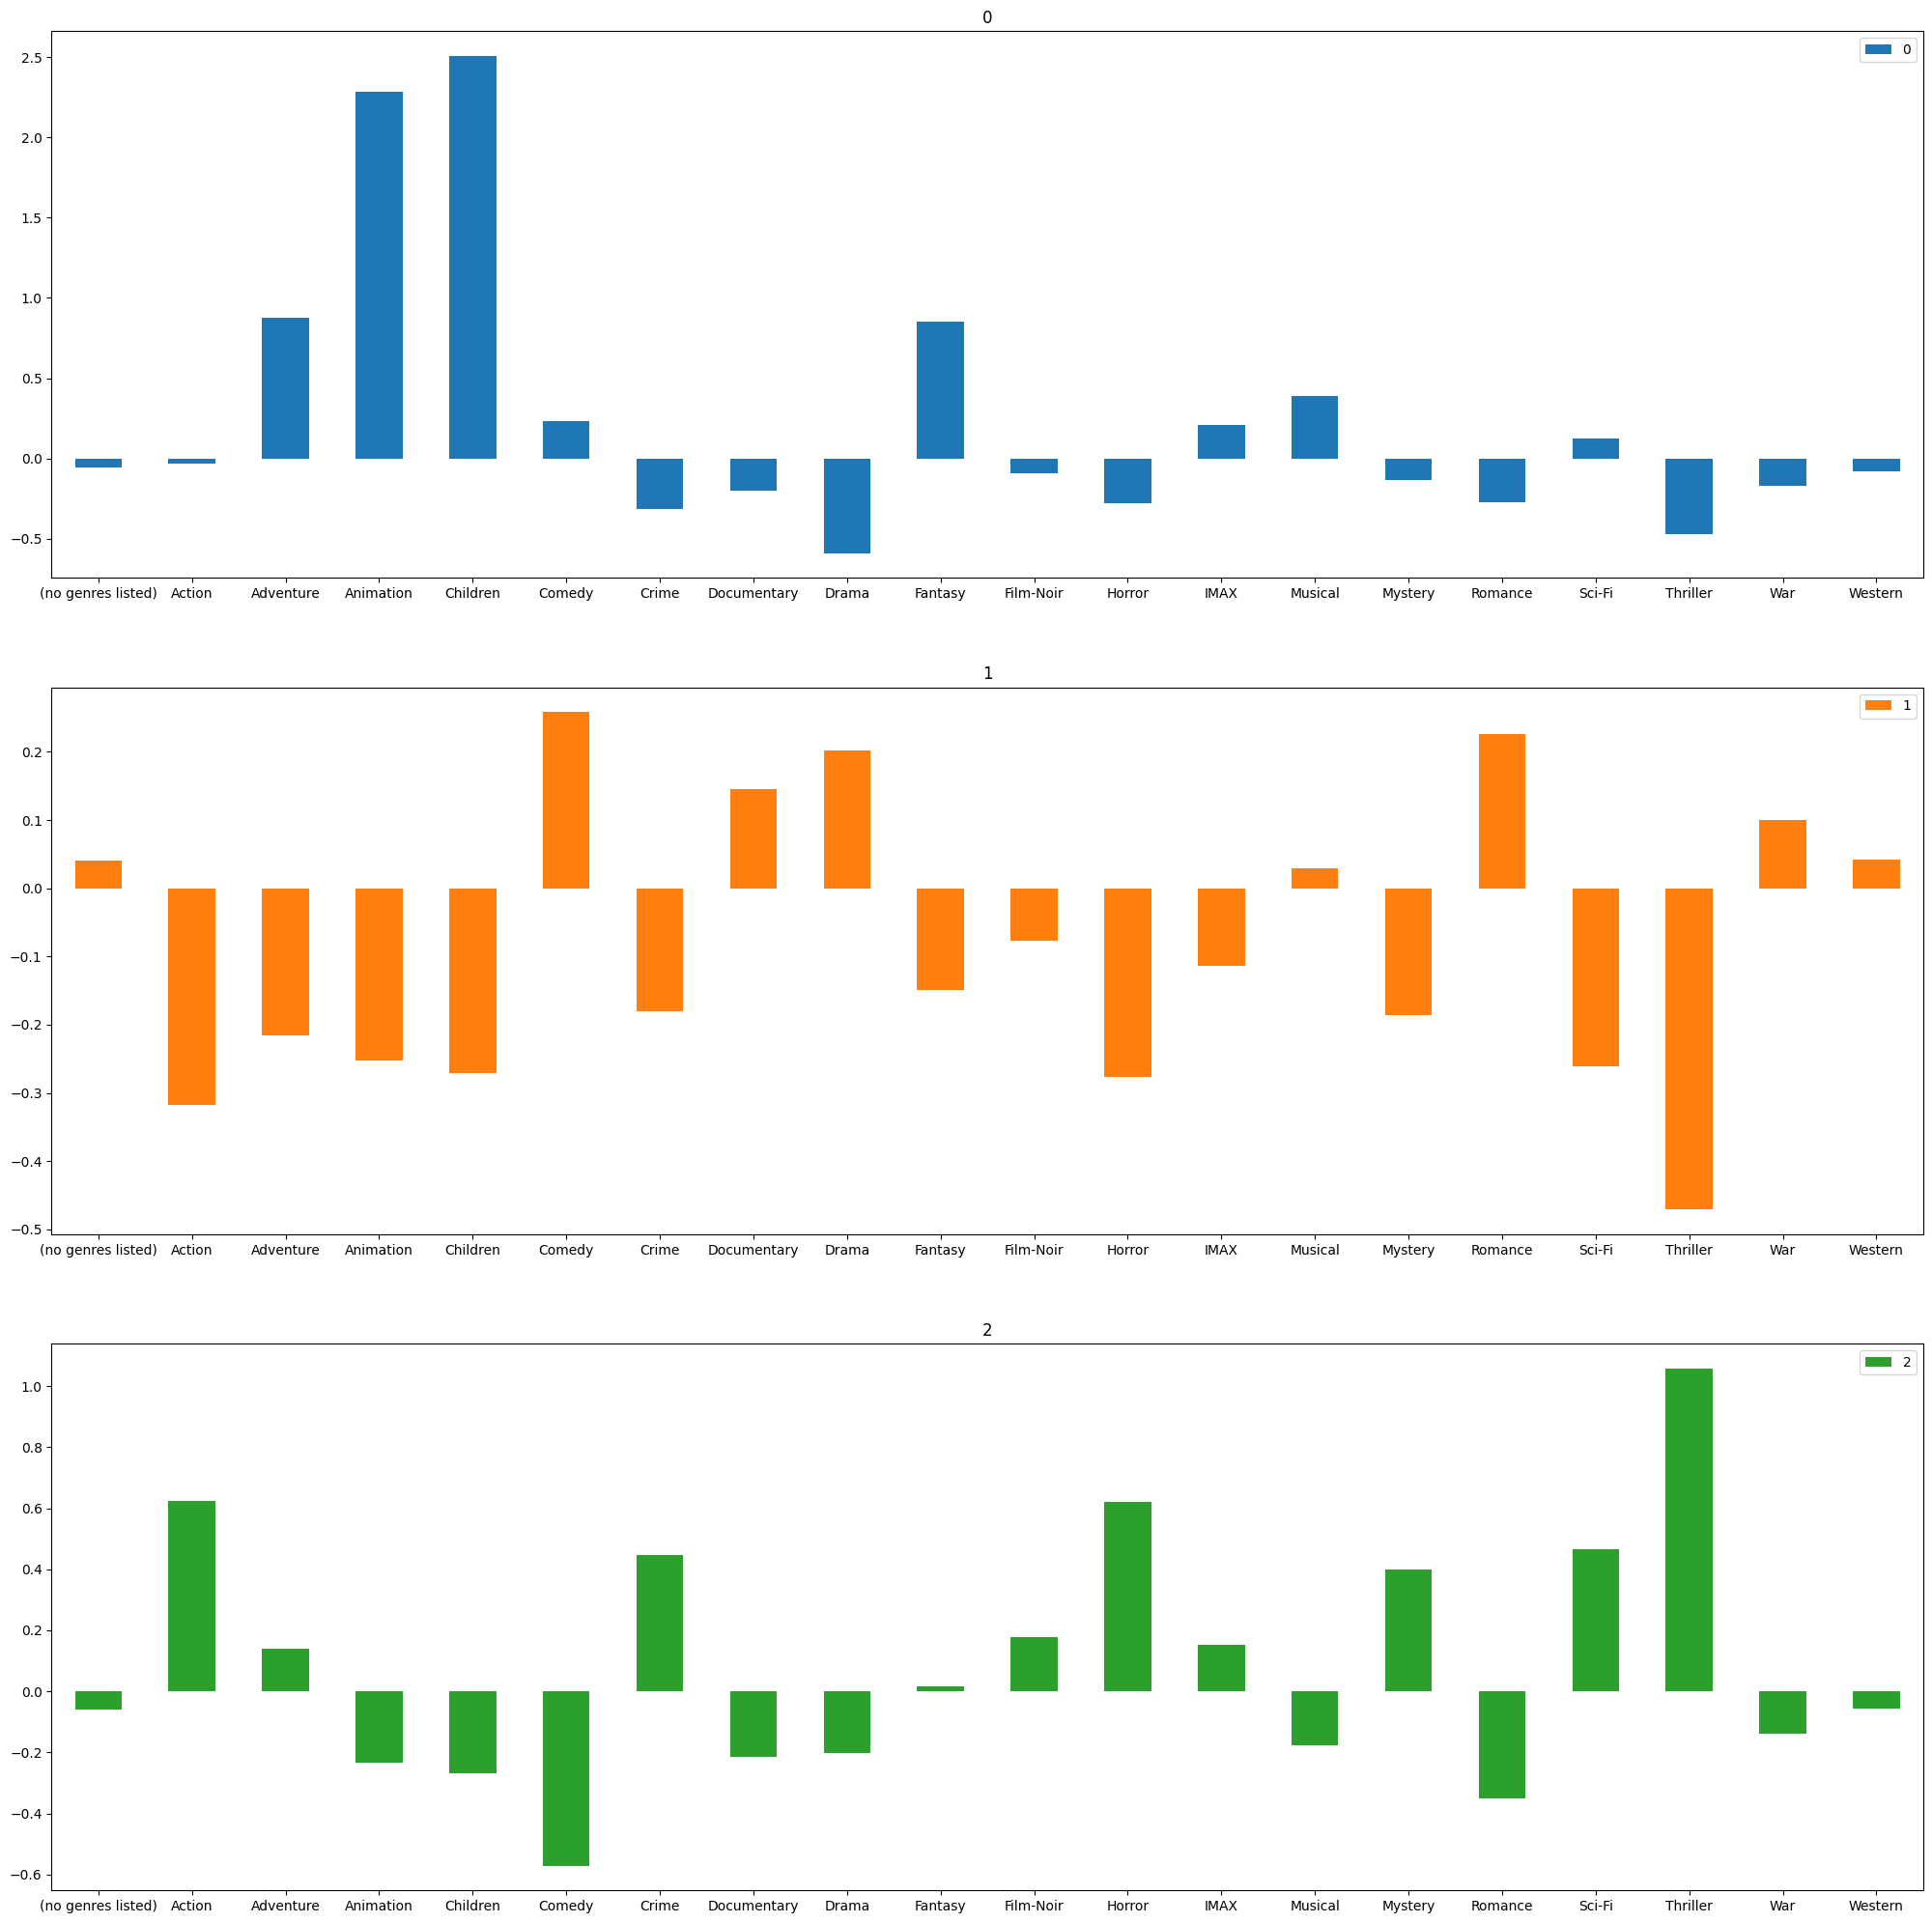

In [20]:
groups.plot.bar(figsize=(25, 25), subplots=True, sharex=False, rot=0);

#### Plotando os grupos em um gráfico de dispersão para observar os centróides
Como plotar um gráfico de n dimensões? **Redução de Dimensionalidade**

In [21]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE()
visualization  = tsne.fit_transform(scaled_genres)
visualization

array([[114.54323 ,  18.149231],
       [ 96.240295,   7.226821],
       [ 11.266098,  -8.337296],
       ...,
       [-94.948204, -28.817518],
       [ 68.85131 ,  19.619045],
       [ 52.11682 , -83.94061 ]], dtype=float32)

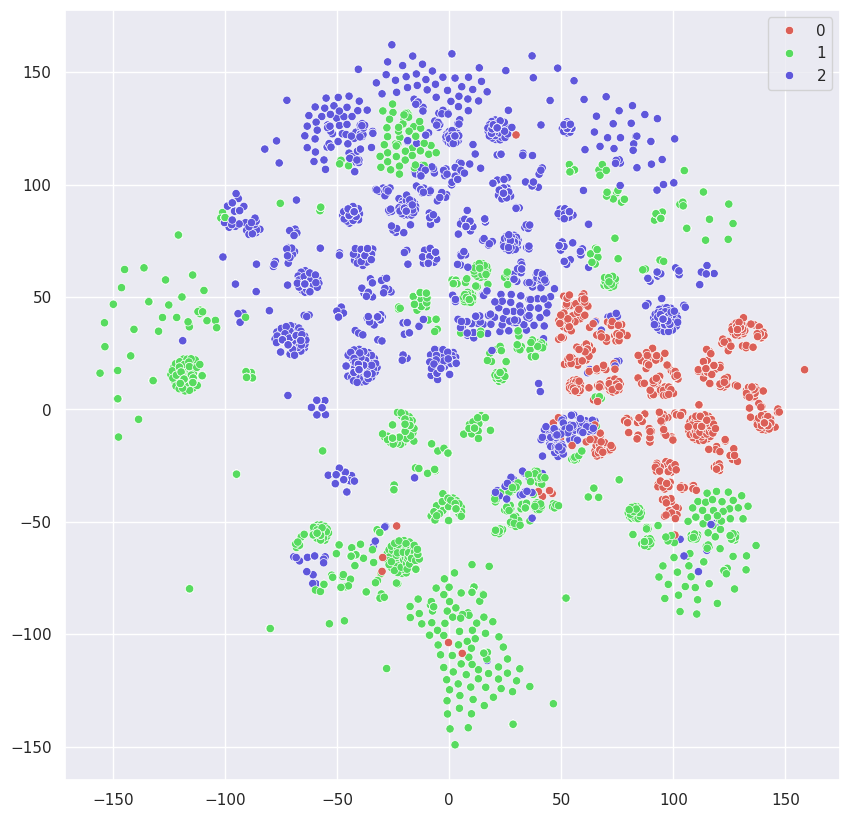

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 10)})
sns.scatterplot(x=visualization[:,0], y=visualization[:,1], hue=model.labels_, palette=sns.color_palette("hls", len(np.unique(groups_created))));

#### Existe algum problema com o nosso modelo?
**Curse of dimensionality** 🤔

### 3.5 O agrupamento fez sentido?

In [24]:
group = 2 # Selecionando o grupo
filter = model.labels_ == group # Criando o filtro
data_movies[filter].sample(10) # Mostrandos os filmes deste filtro

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3284,4444,"Way of the Dragon, The (a.k.a. Return of the D...",Action|Crime,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9303,159061,The Wailing (2016),Mystery|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8763,128592,The Boy Next Door (2015),Mystery|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4453,6574,Eve of Destruction (1991),Action|Sci-Fi|Thriller,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5076,7984,From Beyond (1986),Horror|Sci-Fi,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1035,1347,"Nightmare on Elm Street, A (1984)",Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6722,58964,Inside (À l'intérieur) (2007),Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1217,1616,"Peacemaker, The (1997)",Action|Thriller|War,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9411,165347,Jack Reacher: Never Go Back (2016),Action|Crime|Drama|Mystery|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3028,4052,Antitrust (2001),Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## 4. Avaliando o modelo criado

### 4.1 Otimizando o número de grupos
O número de grupos pode variar dependendo do problema em questão. Entretanto, existem métricas que podem nos ajudar a aumentar ou diminuir este número, ou seja, otimizar o agupamento do nosso modelo.

#### Atributo .inertia_
Soma das distâncias quadradas das amostras ao centro de aglomerado mais próximo

In [25]:
model.inertia_

166103.89188928297

In [26]:
def kmeans(clusters_numbers, genres):
  model = KMeans(n_clusters=clusters_numbers)
  model.fit(genres)
  return [clusters_numbers, model.inertia_]

result = [kmeans(numero_de_grupos, scaled_genres) for numero_de_grupos in range(1, 41)]

result = pd.DataFrame(
result,
            columns=['groups', 'inertia'])


result.head()

,groups,inertia
0,1,194840.000000
1,2,179664.999079
2,3,169267.831048
3,4,155541.125531
4,5,147540.949287


#### Método do cotovelo (Elbow method)
O método do cotovelo nos dá uma idéia de como seria um bom número de clusters k com base na soma da distância ao quadrado (SSE) entre os pontos de dados e os centróides dos clusters atribuídos. Escolhemos k no local em que o SSE começa a se achatar e formar um cotovelo.

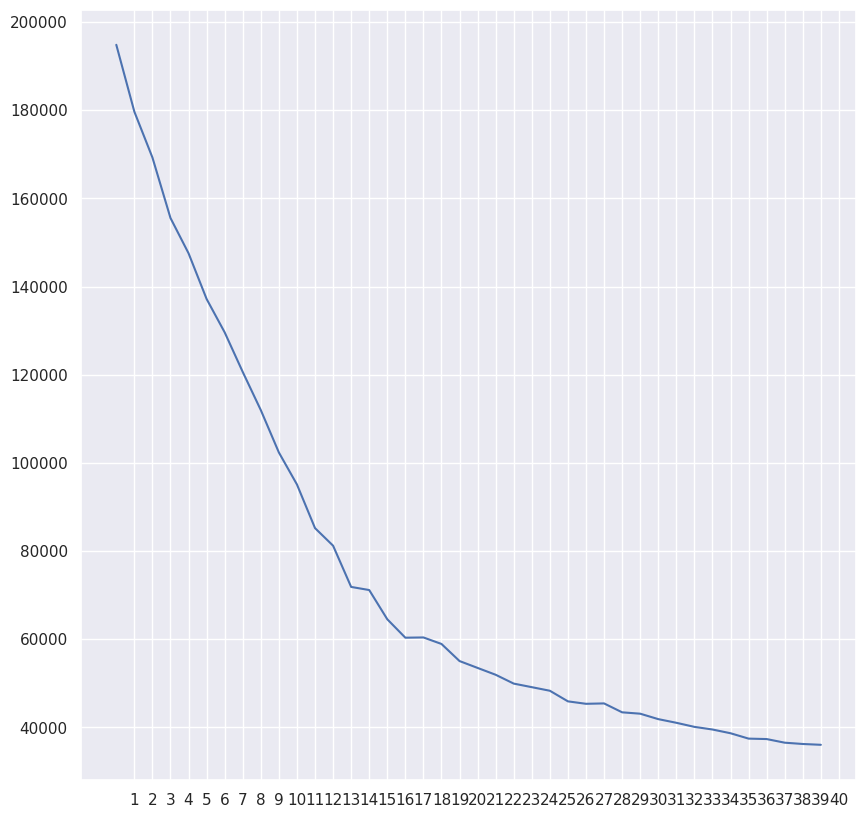

In [27]:
result.inertia.plot(xticks=result.groups);

### 4.2 Experimentações com o modelo

#### Testando um filme aleatório: em qual grupo vai se encaixar?

In [28]:
movie_test = data_movies.sample(1)
movie_test

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6625,56145,"Mist, The (2007)",Horror|Sci-Fi,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [29]:
movie_test.drop(['movieId', 'title', 'genres'], axis=1, inplace=True)
movie_test_result = model.predict(movie_test)
print(f'O filme de teste pertence à categoria: {movie_test_result[0]}')

O filme de teste pertence à categoria: 2


#### Escolha um filme e receba uma recomendação!
Veja a lista abaixo, e selecione anote o id do filme que deseja receber a recomendação.

In [30]:
data_movies[['movieId', 'title']].sample(20).head(20)

,movieId,title
2031,2706,American Pie (1999)
8723,126482,Strange Magic (2015)
8034,98160,Nature Calls (2012)
4914,7368,Never Die Alone (2004)
3685,5075,Waydowntown (2000)
9492,170401,Table 19 (2017)
601,748,"Arrival, The (1996)"
1425,1948,Tom Jones (1963)
9083,143031,Jump In! (2007)
1133,1483,Crash (1996)


In [31]:
selected_id = int(input("Digite o id do filme escolhido: "))

Digite o id do filme escolhido: 3


In [32]:
selected = data_movies[data_movies["movieId"] == selected_id]
title = data_movies[data_movies["movieId"] == selected_id].title
selected.drop(["movieId", "title", "genres"], axis=1, inplace=True)
predict = model.predict(selected)
group = predict[0]
filtro = model.labels_ == group
recommended = data_movies[filtro].sample(1)
print(f'O filme escolhido foi: {title._values[0]}, que se encaixou no grupo {predict[0]}. Recomendo você assistir ao filme: {recommended.title._values[0]}');

O filme escolhido foi: Grumpier Old Men (1995), que se encaixou no grupo 1. Recomendo você assistir ao filme: Face in the Crowd, A (1957)


## 5. O que poderíamos fazer para melhorar nosso agrupamento?

### Para fins acadêmicos, fizemos a divisão em apenas 3 clusters com o objetivo mais "direto ao ponto". Com o Elbow method, encontramos um número melhor para clusterização.
### É necessário mais experimentações para aprimorar nosso modelo!